# Perceptron - Adaline Algorithm

## Perceptron - Adaline

![Adaline](adaline.png)

The perceptron and Adaline are similar perceptron algortihm uses step function as activation function that is non differentiable, the Adaline has logistic function with limits and can be differantiated.  

## Data and variables

(200, 2)
(200,)


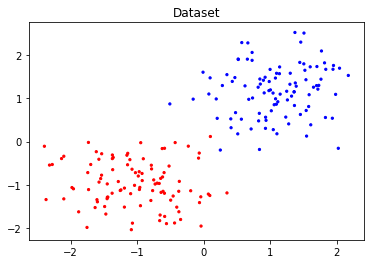

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

#Used to colorize the dataset
def create_color_list(data_set):
    return ["b" if data==1 else "r" for data in data_set]

dimension = 2
size = 100
X_train = np.concatenate((np.random.multivariate_normal(np.ones(dimension), 0.3*np.eye(dimension), size), 
                        np.random.multivariate_normal(-1 * np.ones(dimension), 0.3*np.eye(dimension), size)))

y_train = np.concatenate((np.ones(size), -1*np.ones(size)))

print(X_train.shape)
print(y_train.shape)

plt.scatter(X_train[:, 0], X_train[:, 1], c=create_color_list(y_train), s=5)
plt.title("Dataset")
plt.show()

### Inference - Forward Pass

First linear combination of the inputs is calculated with additional bias term.  

$$v=x_0w_0+x_1w_1+...+x_{n-1}w_{n-1}+w_n$$
Then this linear combination is given to logistic function.  
$$y=tanh(v)$$

In [3]:
#Bias is used
weights = np.random.rand(dimension + 1) - 0.5
data = np.ones((1, dimension))
ground_truth = np.ones(1)
lin_comb = 0
activation = 0
old_weights = weights

#Add 1 to the end of data vector
print("Size of the data before bias: ", data.shape)
data = np.concatenate((data, np.ones((len(data), 1))), axis = 1)
print("Size of the data after bias: ", data.shape)

#Cot product of data with weight for the linear combination 
lin_comb = data.dot(weights)
print("Linear combination: ", lin_comb)

#Cefine activation function
def activation_function(input):
    return np.tanh(input)

#Calculate the output of the neuron
activation = activation_function(lin_comb)
print("Activation: ", lin_comb)

Size of the data before bias:  (1, 2)
Size of the data after bias:  (1, 3)
Linear combination:  [0.47276987]
Activation:  [0.47276987]


### Training

#### Mean Squared Error

In training phase, weights are updated by using backpropagation algorithm. The mean squared error, between output of the adaline $y$ and the ground truth $y_d$, is calculated by using
$$mse=\frac{1}{n}\overset{n}{\sum_{j}}(y_{dj}-y_j)^2$$

In [4]:
def mean_square_error(ground_truth, desired):
    temp = np.square(ground_truth - desired)
    temp = np.mean( temp )
    return temp

print("Mean squared error between %.3f and %.3f is %.3f"%(ground_truth, activation, mean_square_error(ground_truth, activation)))

Mean squared error between 1.000 and 0.440 is 0.313


In the equation, $n$ is the number of neurons. Since there is only one neuron $n=1$. The error between the output and the ground truth is
$$e=y_d-y$$

In [5]:
error = ground_truth - activation
print("Error is ", error)

Error is  [0.5595654]


For the weight $w_i$ at the time step $k$, weight is defined by $w_i(k)$. The backpropagation algorithm calculates how the error is changed with respect to the weight $\frac{\partial E}{\partial w_i(k)}$. To calculate the partial derivative of error with respect to weights, the chain rule is implemented.
$$\frac{\partial E}{\partial w_i(k)}=\frac{\partial E}{\partial e}\frac{\partial e}{\partial y}\frac{\partial y}{\partial v}\frac{\partial v}{\partial w_i(k)}$$
In this equation,  
*$\frac{\partial E}{\partial e}$ is the derivative of mean square error formulation,  
*$\frac{\partial e}{\partial y}$ is the derivative of error,  
*$\frac{\partial y}{\partial v}$ is the derivative of activation function tanh  
*$\frac{\partial v}{\partial w}$ is the derivative of linear combination  
If this terms are substituted,
$$\frac{\partial E}{\partial w_i(k)}=e(-1)(1-tanh^2(v))x_i$$
Here the derivative of tanh function is used, for other activtion function this part must be changed.  

In [6]:
activation_derivative = 1 - np.power(activation, 2)
weight_change = error * -1 * activation_derivative * data
print("Weight change is ", weight_change)

Weight change is  [[-0.45101942 -0.45101942 -0.45101942]]


After this calculation the weights can be updated by using  
$$w_i(k+1)=w_i(k)-lr\frac{\partial E}{\partial w_i(k)}$$
Unsuprisingly, the lr is learning rate.


In [7]:
print("Old weights are ", weights)
lr = 0.01
new_weights = weights - lr * weight_change
print("New weights are ", new_weights)

Old weights are  [-0.12513694  0.1257333   0.47217351]
New weights are  [[-0.12062675  0.1302435   0.47668371]]


### Batch Size

In data perspective, there are three ways to train neural networks  

 1. Batch Gradient Descent: All the data in training set is used for training.  
 2. Stochastic Gradient Descent: Only single randomly selected data is used for training  
 3. Mini-Batch Gradient Descent: Batch size is a number between 1 and whole training set.  

In the code the batch size is actually the mini-batch size. When the batch size is used, the derivatives are calculated for each sample then mean is calculated. $N$ is the batch size.  

$$\frac{\partial E}{\partial w_i(k)} = \frac{1}{N}\sum_{j}\frac{\partial E}{\partial w_{i,j}(k)}$$

### Momentum

Momentum is another useful for tool to improve convergence of neural networks. It is inspired from the physics. Please, look at the class-examples section. With momentum $m$, weight update rule is redefined as 

$$w_i(k+1)=w_i(k)-lr\frac{\partial E}{\partial w_i(k)}+m(w_i(k)-w_i(k-1))$$

In [8]:
batch_size = 16
momentum = 0.9
max_epoch = 1000
lr = 1e-2
weights = np.random.rand(dimension + 1) - 0.5
old_weights = weights
mse = []
for epoch in range(max_epoch):
    #Inference all the data
    #Increase data size by one for bias
    data = np.concatenate((X_train, np.ones((len(X_train), 1))), axis = 1)
    lin_comb = data.dot(weights)
    activation = activation_function(lin_comb)

    #Calculate errors
    error = y_train - activation
    #Clear gradients
    gradients = np.zeros((data.shape[0], data.shape[1]))
    #Calculate gradients
    for i in range(len(X_train)):
        gradients[i] = -1 * error[i] * (1 - activation[i]**2) * data[i]
    #Select random batches and update weights
    indices = list(np.arange(len(X_train)))
    #Shuffle training set
    random.shuffle(indices)
    batch_steps = int(len(X_train) / batch_size)
    for i in range(batch_steps):
        batch_indices = []
        #First sample random indices
        for _ in range(batch_size):
            batch_indices.append(indices.pop())
        #Calculate momentum terms
        momentum_term = momentum * (weights - old_weights)
        old_weights = weights
        #Calculate mini batch gradients
        batch_gradient = gradients[batch_indices].mean(axis = 0)
        #Update weights
        weights = weights - lr * batch_gradient
        #Add momentum
        weights += momentum_term

    #Calculate mean squared error
    mse.append( mean_square_error(y_train, activation) )
    print("Epoch %d, MSE: %f"%(epoch, mse[-1]))
    if(mse[-1] < 0.02):
        break

print("Training ended")

Epoch 0, MSE: 0.762477
Epoch 1, MSE: 0.091981
Epoch 2, MSE: 0.033821
Epoch 3, MSE: 0.028200
Epoch 4, MSE: 0.026749
Epoch 5, MSE: 0.026093
Epoch 6, MSE: 0.025772
Epoch 7, MSE: 0.025483
Epoch 8, MSE: 0.025250
Epoch 9, MSE: 0.025063
Epoch 10, MSE: 0.024828
Epoch 11, MSE: 0.024630
Epoch 12, MSE: 0.024414
Epoch 13, MSE: 0.024229
Epoch 14, MSE: 0.024084
Epoch 15, MSE: 0.023901
Epoch 16, MSE: 0.023753
Epoch 17, MSE: 0.023632
Epoch 18, MSE: 0.023499
Epoch 19, MSE: 0.023377
Epoch 20, MSE: 0.023265
Epoch 21, MSE: 0.023140
Epoch 22, MSE: 0.023046
Epoch 23, MSE: 0.022932
Epoch 24, MSE: 0.022833
Epoch 25, MSE: 0.022724
Epoch 26, MSE: 0.022618
Epoch 27, MSE: 0.022534
Epoch 28, MSE: 0.022444
Epoch 29, MSE: 0.022359
Epoch 30, MSE: 0.022271
Epoch 31, MSE: 0.022188
Epoch 32, MSE: 0.022102
Epoch 33, MSE: 0.022016
Epoch 34, MSE: 0.021948
Epoch 35, MSE: 0.021873
Epoch 36, MSE: 0.021793
Epoch 37, MSE: 0.021717
Epoch 38, MSE: 0.021657
Epoch 39, MSE: 0.021600
Epoch 40, MSE: 0.021535
Epoch 41, MSE: 0.021476
Ep

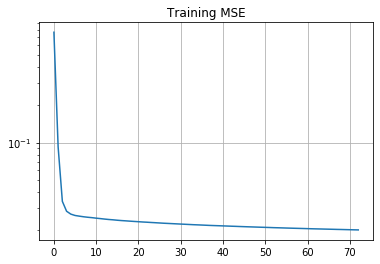

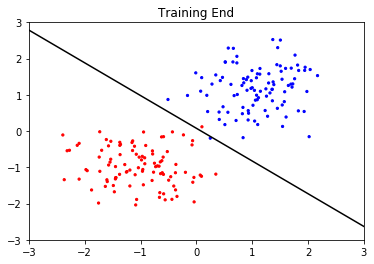

In [9]:
#Plot MSE and discriminator line
mse = np.array(mse)
plt.plot(np.arange(len(mse)), mse)
plt.grid()
plt.yscale('log')
plt.title("Training MSE")
plt.show()

#Draw class separating line
discriminator = np.zeros((2,2))
discriminator[0,0] = -10
discriminator[1,0] = 10
discriminator[0,1] = -1 * (weights[0] * discriminator[0,0] + weights[2]) / weights[1]
discriminator[1,1] = -1 * (weights[0] * discriminator[1,0] + weights[2]) / weights[1]
plt.scatter(X_train[:, 0], X_train[:, 1], c=create_color_list(y_train), s=5)
plt.plot(discriminator[:, 0], discriminator[:, 1], c='k')
plt.axis([-3, 3, -3, 3])
plt.title("Training End")
plt.show()